# 2절. 분류모형

## 확률적 생성모형

### QDA(이차 판별 분석)

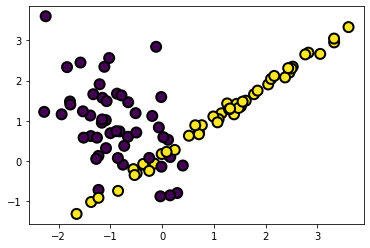

In [27]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                          n_classes=2, random_state=9)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=100, edgecolor="k", linewidth=2)
plt.show()

In [28]:
X[y==1, :] = -(X[y==0, :])

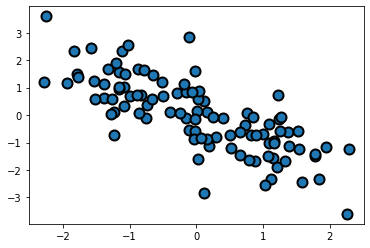

In [30]:
plt.scatter(X[:, 0], X[:,1], marker="o", s=100, edgecolor="k", linewidth=2)
plt.show()

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

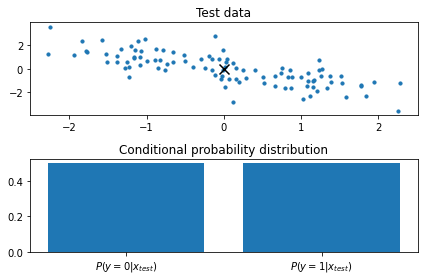

In [33]:
x = [[0, 0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c="k", s=100, marker="x")
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

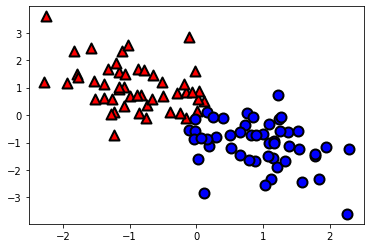

In [35]:
h = model.predict(X)
plt.scatter(X[h==0,0], X[h==0,1], marker="^", c="r", s=100, edgecolor="k", linewidth=2)
plt.scatter(X[h==1,0], X[h==1,1], marker="o", c="b", s=100, edgecolor="k", linewidth=2)
plt.show()

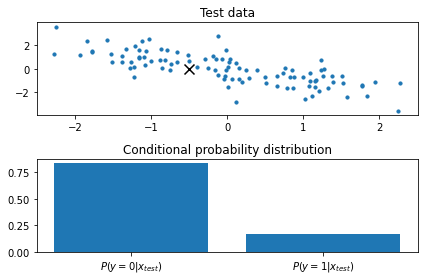

In [36]:
x = [[-0.5, 0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c="k", s=100, marker="x")
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

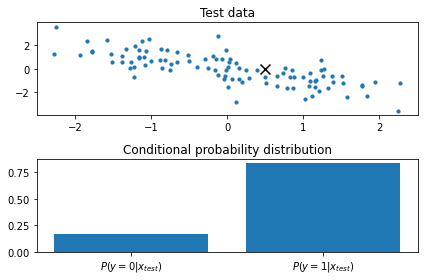

In [37]:
x = [[0.5, 0]]
p = model.predict_proba(x)[0]
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], s=10)
plt.scatter(x[0][0], x[0][1], c="k", s=100, marker="x")
plt.title("Test data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("Conditional probability distribution")
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.tight_layout()
plt.show()

### 나이브베이즈

In [38]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:,:-1]
y = iris.species

In [39]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y)

MultinomialNB()

In [40]:
X_test = [[5.0, 3.4, 1.2, 0.25]]
model.predict(X_test)

array(['setosa'], dtype='<U10')

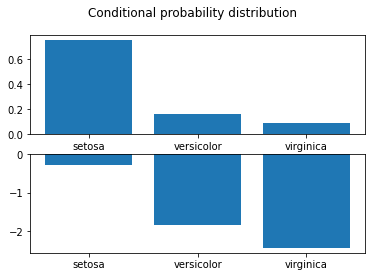

In [41]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(X_test)[0])
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(X_test)[0])
plt.xticks(model.classes_)
plt.suptitle("Conditional probability distribution")
plt.show()

## 확률적 판별모형

### 로지스틱 회귀모형

In [10]:
from sklearn.datasets import make_classification
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1,
                          random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [12]:
import numpy as np
xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]

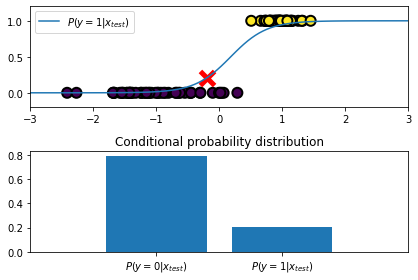

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

X_test = [[-0.2]]
plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X, y, marker="o", c=y, s=100, edgecolor="k", linewidth=2)
plt.scatter(X_test[0], model.predict_proba(X_test)[0][1:], marker="x", s=200, c="r", lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("Conditional probability distribution")
plt.tight_layout()
plt.show()

### 의사결정나무 모형

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=1, random_state=0)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [3]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

In [4]:
def draw_decision_tree(model, feature_names=feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ("s", "^", "o")
    colors = ("red", "blue", "lightgreen")
    cmap = mpl.colors.ListedColormap(colors)
    
    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(["k"]))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=0.8,
                   c=[cmap(idx)], marker=markers[idx], s=80, label=cl)
    
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc="upper left")
    
    return Z

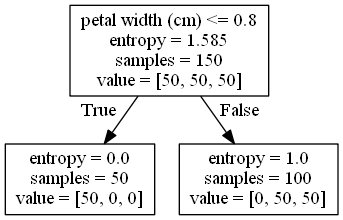

In [19]:
draw_decision_tree(dt, feature_names=data.feature_names[2:])

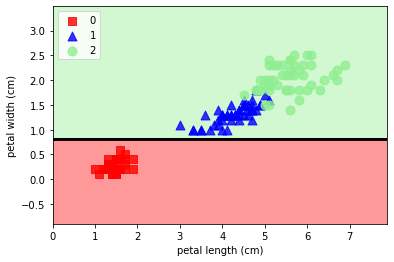

In [20]:
plot_decision_regions(X, y, dt, "Depth 1")
plt.show()

In [21]:
dt5 = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
dt5.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

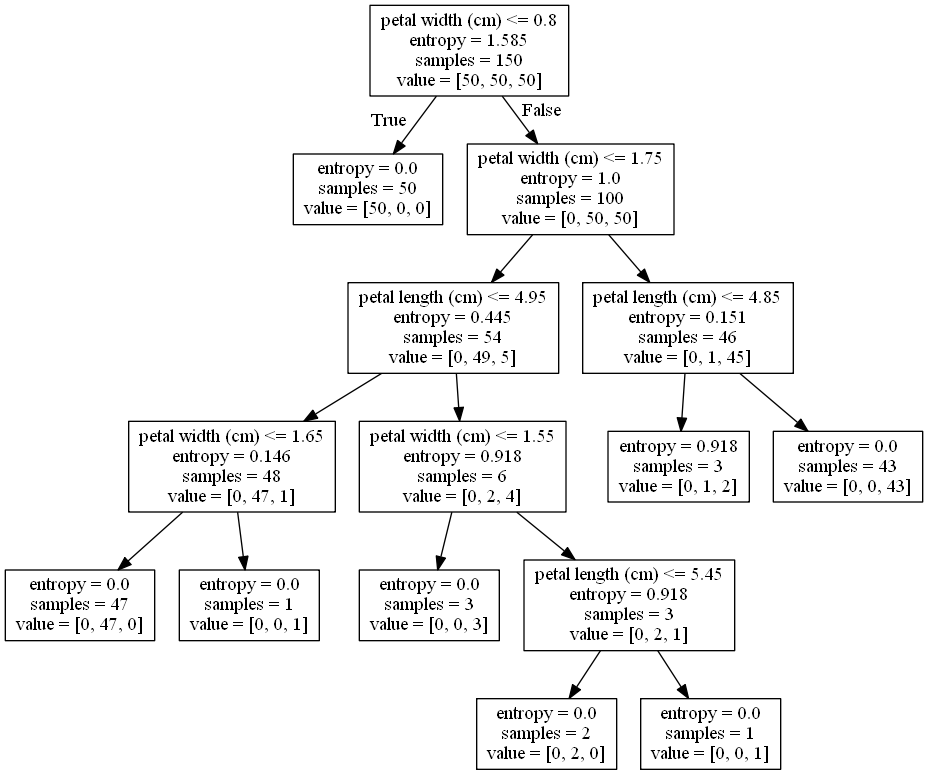

In [22]:
draw_decision_tree(dt5, feature_names=data.feature_names[2:])

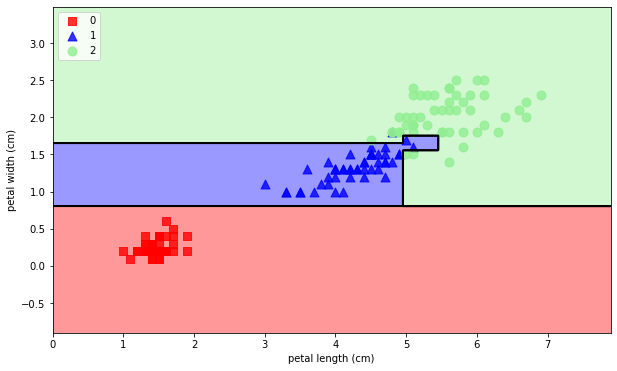

In [23]:
plt.figure(figsize=(10,6))
plot_decision_regions(X,y,dt5, "Depth 5")
plt.show()

In [26]:
X = data.data
y = data.target
dt6 = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=0).fit(X,y)

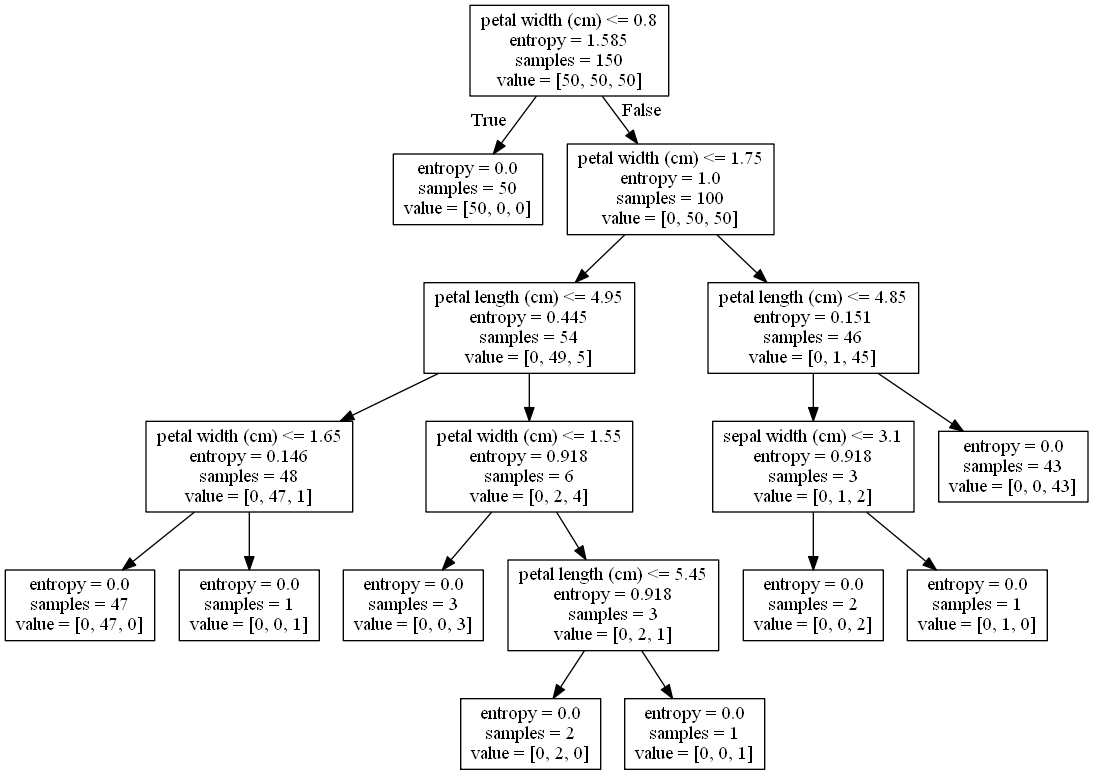

In [27]:
draw_decision_tree(dt6, feature_names=data.feature_names)

## 판별함수 기반 모형

### 퍼셉트론

In [29]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

In [30]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1).fit(X,y)

<ipython-input-33-db428bb5f133>:11: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,ZZ, color="r")


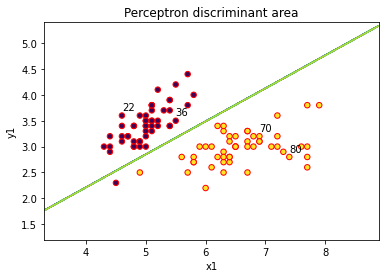

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1
Y_min, Y_max = X[:, 1].min()-1, X[:, 1].max()+1

XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000),
                    np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

plt.contour(XX,YY,ZZ, color="r")
plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolor="r", linewidth=1)

idx = [22, 36,70, 80]
for i in idx:
    plt.annotate(i, xy=(X[i,0], X[i,1]+0.1))

plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.ylabel("y1")
plt.show()

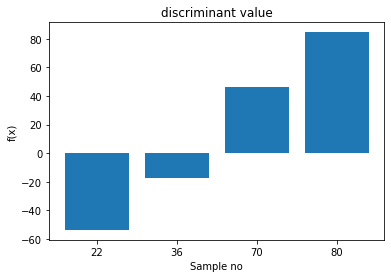

In [35]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

In [36]:
from sklearn.datasets import load_iris
iris =load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target==0, iris.target==1)
X = iris.data[idx, :3]
y = iris.target[idx]

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

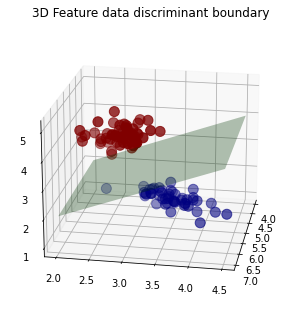

In [40]:
fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, marker="o", s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4,4], [7,7]]), np.array([[2,4.5], [2, 4.5]]),
               np.array([[2,4], [2,4]]), color="g", alpha=.3)
plt.title("3D Feature data discriminant boundary")
plt.show()

### 커널 svm

In [43]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3,3,500))
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0]>0, X[:,1]>0)

In [44]:
from sklearn.svm import NuSVC
model = NuSVC().fit(X,Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

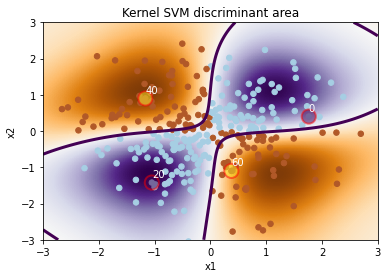

In [46]:
import matplotlib.pyplot as plt
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           aspect="auto", origin="lower", cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels = [0], linewidths=3)
plt.scatter(X[:,0], X[:,1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0,20,40,60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5, edgecolor="r", linewidth=2)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i,1]+0.15), color="white")
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM discriminant area")
plt.show()

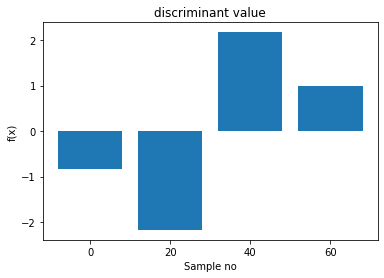

In [49]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

## 다중 클래스 분류

### OvO

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

model = OneVsOneClassifier(LogisticRegression())
model.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression())

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

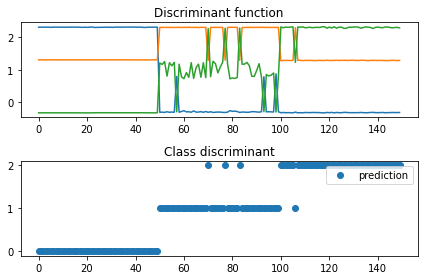

In [6]:
ax1 = plt.subplot(211)
pd.DataFrame(model.decision_function(iris.data)).plot(ax=ax1, legend=False)

plt.title("Discriminant function")
ax2 = plt.subplot(212)
pd.DataFrame(model.predict(iris.data), columns=["prediction"]).plot(marker="o", ls="", ax=ax2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

### OvR

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

model = OneVsRestClassifier(LogisticRegression())
model.fit(iris.data, iris.target)

OneVsRestClassifier(estimator=LogisticRegression())

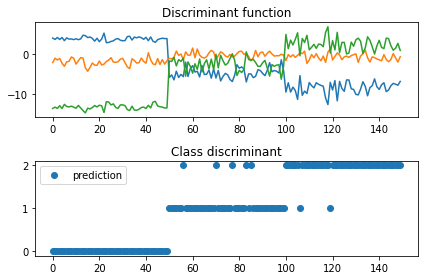

In [8]:
ax1 = plt.subplot(211)
pd.DataFrame(model.decision_function(iris.data)).plot(ax=ax1, legend=False)

plt.title("Discriminant function")
ax2 = plt.subplot(212)
pd.DataFrame(model.predict(iris.data), columns=["prediction"]).plot(marker="o", ls="", ax=ax2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

# 3절. 인공신경망

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30), max_iter=500)
mlp.fit(X_train, y_train)

C:\Users\black\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 30), max_iter=500)

In [13]:
import pandas as pd
pred = mlp.predict(X_test)
pd.crosstab(y_test, pred)

col_0,0,1,2
row_0,,,
0,13,0,0
1,0,16,0
2,0,0,9


In [14]:
mlp.score(X_test, y_test)

1.0

In [15]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification

In [16]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0),
           make_circles(noise=0.2, factor=0.5, random_state=1),
           (X,y)]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

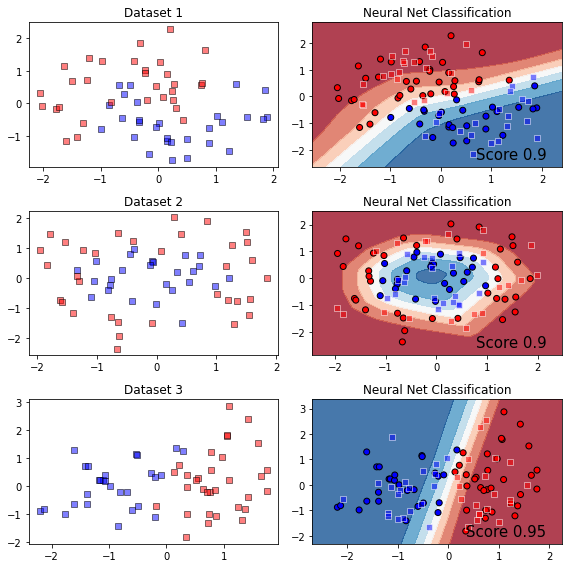

In [24]:
figure = plt.figure(figsize=(8,8))
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    x_min, x_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title(f"Dataset {ds_cnt+1}")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, 
              edgecolors="k", marker="s", alpha=0.5)
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)
    
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    
    #결정경계
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    Z = Z.reshape(xx.shape)
    #등고선을 이용해 시각화
    ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=cm_bright, edgecolors="k")
    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, 
               cmap=cm_bright, edgecolors="w", marker="s", alpha=0.5)
    ax.set_title("Neural Net Classification")
    ax.text(xx.max()-0.3, yy.min()+0.3, (f"Score {score}").lstrip("0"), 
            size=15, horizontalalignment="right")
    
plt.tight_layout()
plt.show()

# 4절. 분류 모형 성능 평가

In [25]:
import pandas as pd
result = pd.read_csv("http://javaspecialist.co.kr/pds/382")
result.head()

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0


In [26]:
pd.crosstab(result.y_true, result.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [31]:
from sklearn.metrics import precision_score
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [32]:
from sklearn.metrics import recall_score
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [33]:
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [34]:
1 - recall_score(result.y_true, result.y_pred, pos_label=0)

0.013455657492354778

In [35]:
from sklearn.metrics import f1_score
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [36]:
import seaborn as sns
iris = sns.load_dataset("iris")
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt.predict(X_test)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## roc-auc

In [48]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, 
                           n_informative=2, n_redundant=0, random_state=0)

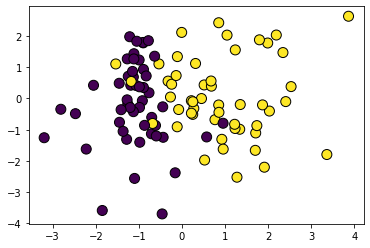

In [49]:
plt.scatter(X[:,0], X[:, 1], marker="o", c=y, s=100, edgecolor="k")

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X, y)

LogisticRegression(random_state=0)

In [52]:
y_pred = model.predict(X)
f_value = model.decision_function(X)

In [54]:
df = pd.DataFrame(np.c_[f_value, y_pred, y],
                 columns=["f_value", "y_pred", "y_true"])
df.sort_values("f_value", ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,f_value,y_pred,y_true
0,11.454496,1.0,1.0
1,8.170554,1.0,1.0
2,7.143225,1.0,1.0
3,7.111102,1.0,1.0
4,7.018470,1.0,1.0
...,...,...,...
95,-5.587140,0.0,0.0
96,-5.607419,0.0,0.0
97,-5.707310,0.0,0.0
98,-6.484490,0.0,0.0


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[48,  2],
       [ 5, 45]], dtype=int64)

In [62]:
from sklearn.metrics import recall_score
recall = recall_score(y, y_pred)

In [63]:
specificity = recall_score(y, y_pred, pos_label=0)
fallout = 1 - specificity
fallout

0.040000000000000036

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([12.45449559, 11.45449559,  2.6601419 ,  2.65484312,  1.60696234,
         1.50599055, -0.16668978, -1.40700746, -1.408684  , -1.92632464,
        -2.02228104, -2.55383198, -2.65345426, -7.86293217]))

In [65]:
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.36, 0.36, 0.6 , 0.6 ,
        0.76, 0.76, 1.  ]),
 array([0.  , 0.02, 0.46, 0.46, 0.66, 0.66, 0.94, 0.94, 0.96, 0.96, 0.98,
        0.98, 1.  , 1.  ]),
 array([1.99998940e+00, 9.99989398e-01, 9.34633336e-01, 9.34308867e-01,
        8.32989220e-01, 8.18466246e-01, 4.58423779e-01, 1.96706488e-01,
        1.96441708e-01, 1.27157945e-01, 1.16883333e-01, 7.21694707e-02,
        6.57764272e-02, 3.84596109e-04]))

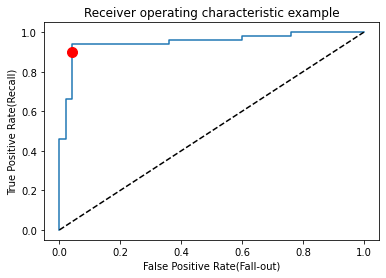

In [75]:
recall = recall_score(y, y_pred)
specificity = recall_score(y, y_pred, pos_label=0)
fallout = 1 - specificity

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], "k--", label="random guess")
plt.plot([fallout], [recall], "ro", ms=10)
plt.xlabel("False Positive Rate(Fall-out)")
plt.ylabel("True Positive Rate(Recall)")
plt.title("Receiver operating characteristic example")
plt.show()

In [76]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.95, 0.05], random_state=5)

In [80]:
lr = LogisticRegression().fit(X, y)
pred1 = lr.predict(X)

In [82]:
from sklearn.svm import SVC
svc = SVC(gamma=0.0001, C=3000, probability=True).fit(X,y)
pred2 = svc.predict(X)

In [84]:
print(confusion_matrix(y, pred1))

[[940   3]
 [ 30  27]]


In [85]:
print(confusion_matrix(y, pred2))

[[940   3]
 [ 30  27]]


In [87]:
print(classification_report(y, pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



In [88]:
print(classification_report(y, pred2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       943
           1       0.90      0.47      0.62        57

    accuracy                           0.97      1000
   macro avg       0.93      0.74      0.80      1000
weighted avg       0.97      0.97      0.96      1000



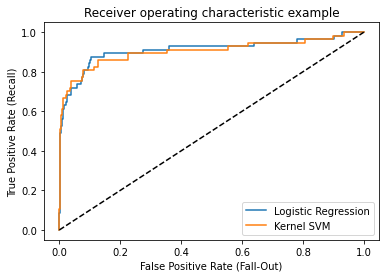

In [91]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y, lr.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, svc.decision_function(X))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [92]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

In [98]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0,1,2])

C:\Users\black\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [99]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

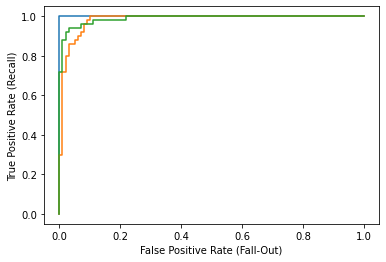

In [101]:
for i in range(3):
    model = GaussianNB().fit(X,y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel("False Positive Rate (Fall-Out)")
plt.ylabel("True Positive Rate (Recall)")
plt.show()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [6]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", 
        "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

In [8]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [11]:
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)
datasets = [make_moons(noise=0.3, random_state=0),
           make_circles(noise=0.2, factor=0.5, random_state=1),
           linearly_separable]

<ipython-input-16-26c76847088e>:23: UserWarning: Attempting to set identical bottom == top == -2.6433716734777684 results in singular transformations; automatically expanding.
  ax.set_ylim(yy.min(), yy.min())
<ipython-input-16-26c76847088e>:23: UserWarning: Attempting to set identical bottom == top == -2.851825605728012 results in singular transformations; automatically expanding.
  ax.set_ylim(yy.min(), yy.min())
<ipython-input-16-26c76847088e>:23: UserWarning: Attempting to set identical bottom == top == -2.313706956958681 results in singular transformations; automatically expanding.
  ax.set_ylim(yy.min(), yy.min())


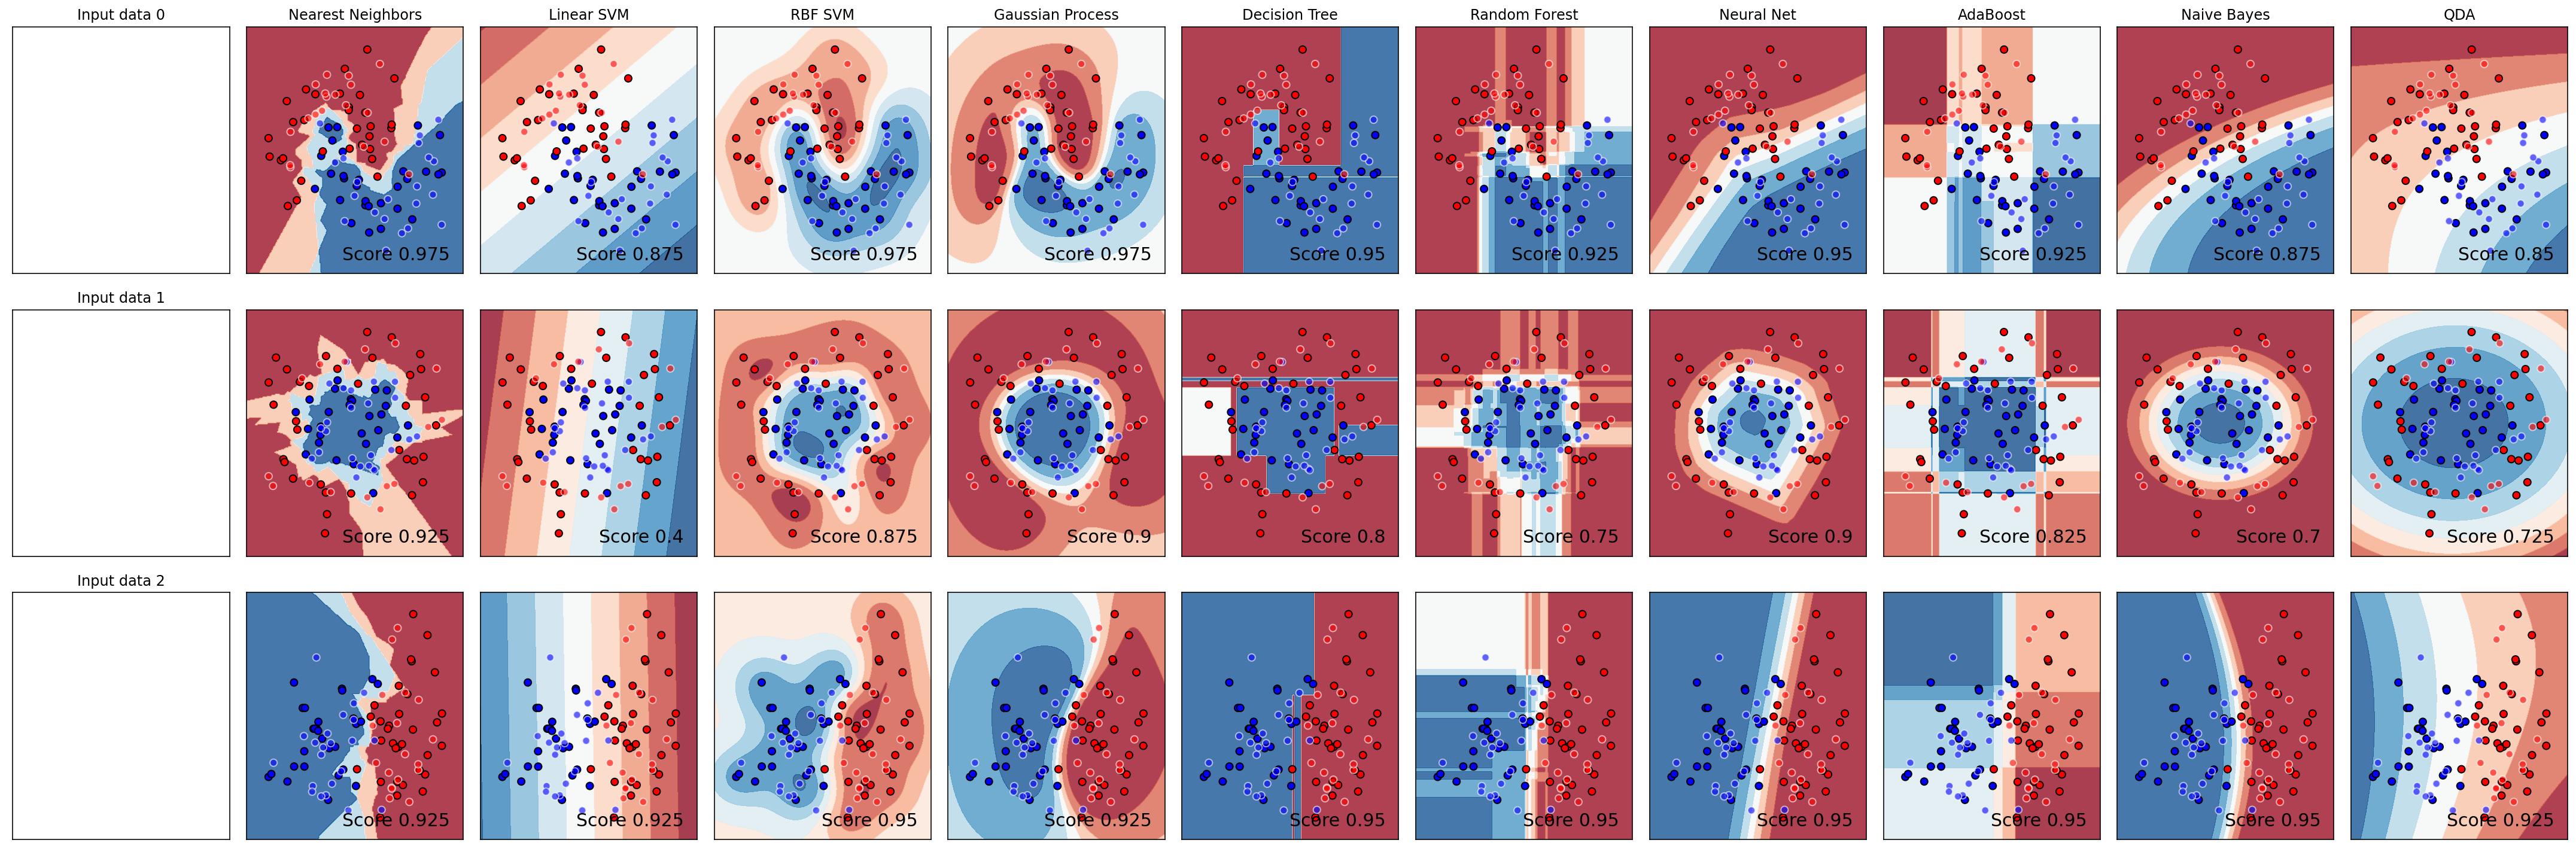

In [16]:
figure = plt.figure(figsize=(30,10))
h = 0.02
i=1

for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers)+1, i)
    ax.set_title(f"Input data {ds_cnt}")
    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.min())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    for name, model in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers)+1, i)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        
        if hasattr(model, "decision_function"):
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors="w", alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max()-0.3, yy.min()+0.3, 
                (f"Score {score}").lstrip("0"), size=15, horizontalalignment="right")
        i += 1
        
plt.tight_layout()
plt.show()

# 5절. 연습문제

In [20]:
import pandas as pd
data = pd.read_csv("winequality-red.csv", sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [41]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (50,50,30), random_state=1)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 30), random_state=1)

In [42]:
model.score(X_train, y_train)
pred = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.625

# 6절. 예제

## 예제1

In [46]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

wine = load_wine()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, 
                                                    stratify=wine.target, random_state=0)
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

train_score = dt.score(X_train, y_train)
test_score = dt.score(X_test, y_test)

train_score, test_score

(1.0, 0.8888888888888888)

In [47]:
dt2 = DecisionTreeClassifier(max_depth=2, random_state=0)
dt2.fit(X_train, y_train)

train_score2 = dt2.score(X_train, y_train)
test_score2 = dt2.score(X_test, y_test)

train_score2, test_score2

(0.9097744360902256, 0.7555555555555555)

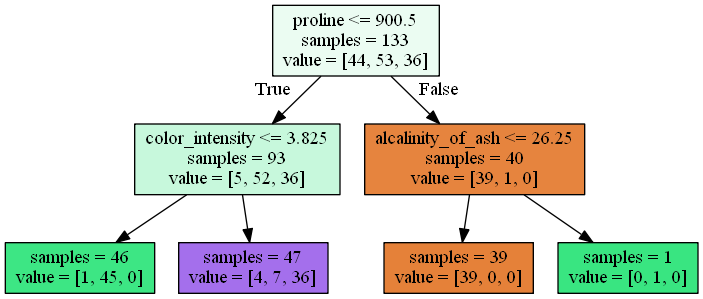

In [77]:
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names=wine.feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names, filled=True, impurity=False)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(dt2)

In [79]:
feature_imp = dt2.feature_importances_
feature_imp

array([0.        , 0.        , 0.        , 0.02885475, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.43979596,
       0.        , 0.        , 0.53134929])

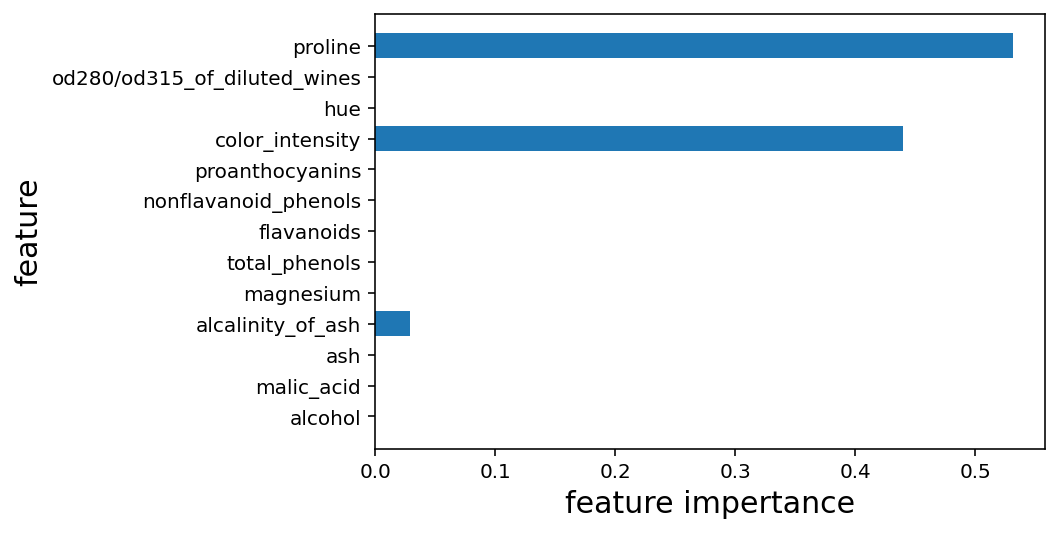

In [81]:
import numpy as np
n_feature = wine.data.shape[1]
idx = np.arange(n_feature)

plt.barh(idx, feature_imp, align="center")
plt.yticks(idx, wine.feature_names)
plt.xlabel("feature impertance", size=15)
plt.ylabel("feature", size=15)
plt.show()

## 예제2

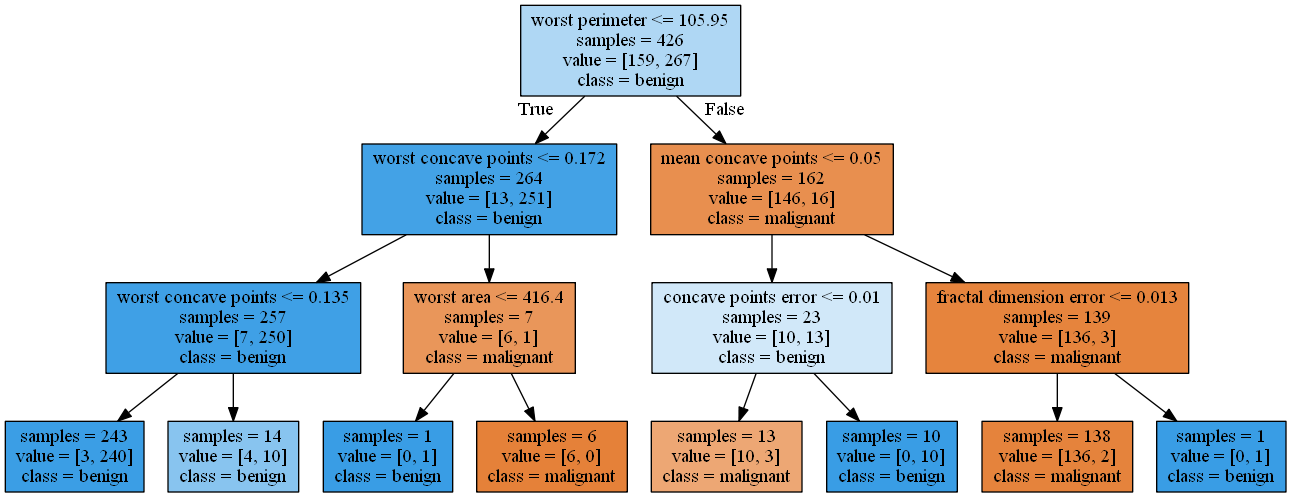

In [84]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pydot

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=29)
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)
dt.score(X_train, y_train), dt.score(X_test, y_test)

dt2 = DecisionTreeClassifier(max_depth=3, random_state=29)
dt2.fit(X_train, y_train)
dt2.score(X_train, y_train), dt2.score(X_test, y_test)

export_graphviz(dt2, out_file="dt2.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)
(graph,) = pydot.graph_from_dot_file("dt2.dot", encoding="utf8")
graph.write_png("dt2.png")
Image("dt2.png")